<a href="https://colab.research.google.com/github/IndrajeetDatta/Algorithms/blob/main/st120644_Indrajeet_Datta_DSA_Assignment_9_Dijkstra's_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the **`math`** library

In [ ]:
import math

Defining the  `Node` class.





In [ ]:
class Node:
 
  def __init__(self, index, key=math.inf):
    self.index = index
    self.next = None
    self.key = key
    self.parent = None

Defining the `PriorityQueue` class.

In [ ]:
class PriorityQueue:
  
  def __init__(self):
    self.p = None
    self.r = None 

  def is_empty(self):
    if self.p == None:
      return True
  
  def enqueue(self, Node):
    x = self.p
    if self.is_empty():
      self.p = Node
      self.r = Node
    else:
      if self.p.key >= Node.key:
        original_p = self.p
        self.p = Node
        self.p.next = original_p
      elif self.r.key < Node.key:
        self.r.next = Node
        self.r = Node
      else:
        y = x
        while x.next != None and x.key < Node.key:
          y = x
          x = x.next
        y.next = Node
        Node.next = x
      
  def dequeue(self):

    if self.is_empty():
      return None
    x = self.p
    if self.p == self.r:
      self.p = None
      self.r = None
    else:
      self.p = self.p.next
    return x
  
  def decrease_key(self, index, key):
    x = self.p
    y = None
    while x.index != index:
      y = x 
      x = x.next
    x.key = key
    if x == self.p:
      return
    elif x == self.r:
      y.next = None
      self.r = y 
      self.enqueue(x)
    else:
      y.next = x.next
      self.enqueue(x)
    
  def has(self, V):
    x = self.p

    while(x != None and x.index != V.index):
      x = x.next 
    if x == None:
      return False
    return True

  def print_queue(self):
    x = self.p
    if x == None:
      return
    index = x.index
    key = x.key
    print(index, "|", key, "|", end=' ')
    x = x.next
    while x != None:
      index = x.index
      key = x.key
      print(" >=======>|", index, "|", key, "|", end=' ')
      x = x.next

Defining the `Graph` class

In [ ]:
class Graph:
  
  def __init__(self, vertices, weights):
    self.vertices = vertices
    self.weights = weights
    self.Adj = {}
    
    for vertex in self.vertices:
      self.Adj[vertex.index] = []
    
    for key, value in weights.items():
      self.Adj[key[0].index].append({key[1]:value})

Defining `build_priorityqueue` method.

In [ ]:
def build_priorityqueue(vertices):
  PQ = PriorityQueue()
  for vertex in vertices:
    PQ.enqueue(vertex)
  return PQ

Defining `dijkstra` method.

In [ ]:
def dijkstra(graph, root):
  v_mst = []
  for node in graph.vertices:
    node.key = math.inf
    node.parent = None

  root.key = 0
  Q = build_priorityqueue(graph.vertices)
  iteration = 0;

  while not Q.is_empty():
    iteration += 1
    u = Q.dequeue()
    for v in graph.Adj[u.index]:
        v_ = list(v.keys())[0]
        if u.key + graph.weights[(u, v_)] < v_.key:
            v_.parent = u
            Q.decrease_key(v_.index, u.key + graph.weights[(u,v_)])
  
    print("Iteration: ", iteration)
  
    for node in graph.vertices:
        print("Vertex: ", node.index, "Key: ", node.key, "Parent: ", node.parent.index if node.parent != None else "Nil") 
  
    print("-" * 50)

To test the implemented algorithm, I applied it to the graph from the problem question of assignment 9. The image of the graph is shown below:

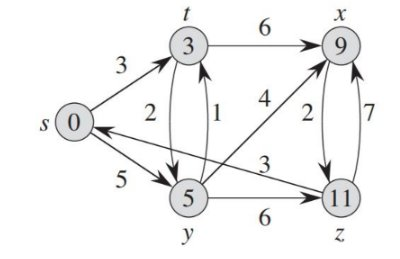

The graph above contains 5 nodes *{s, t, x, y, z}* with the root node taken to be **s**

Initializing nodes.

In [ ]:
s = Node('S')
t = Node('T')
x = Node('X')
y = Node('Y')
z = Node('Z')

Creating a list of nodes as vertices of the graph.

In [ ]:
vertices = [s, t, x, y, z]

Creating a dict of edges as keys defined by tuples containing end vertices and weights as values.

In [ ]:
weights = {
    (s, t): 3, (s, y): 5,
    (t, y): 2, (t, x): 6,
    (x, z): 2,
    (y, t): 1, (y, x): 4, (y, z): 6,
    (x, x): 7, (z, s): 3
}

Initializing a `Graph` object with the vertices and weights defined earlier.

In [ ]:
graph = Graph(vertices, weights)

Initializing root as node `a` and then running the *dijkstra* function on the graph.



In [ ]:
root = s
dijkstra(graph, root)

Initial Priority Queue: 
S | 0 |  >=======>| Z | inf |  >=======>| Y | inf |  >=======>| X | inf |  >=======>| T | inf | --------------------------------------------------
Iteration:  1
Vertex:  S Key:  0 Parent:  Nil
Vertex:  T Key:  3 Parent:  S
Vertex:  X Key:  inf Parent:  Nil
Vertex:  Y Key:  5 Parent:  S
Vertex:  Z Key:  inf Parent:  Nil
--------------------------------------------------
Iteration:  2
Vertex:  S Key:  0 Parent:  Nil
Vertex:  T Key:  3 Parent:  S
Vertex:  X Key:  9 Parent:  T
Vertex:  Y Key:  5 Parent:  S
Vertex:  Z Key:  inf Parent:  Nil
--------------------------------------------------
Iteration:  3
Vertex:  S Key:  0 Parent:  Nil
Vertex:  T Key:  3 Parent:  S
Vertex:  X Key:  9 Parent:  T
Vertex:  Y Key:  5 Parent:  S
Vertex:  Z Key:  11 Parent:  Y
--------------------------------------------------
Iteration:  4
Vertex:  S Key:  0 Parent:  Nil
Vertex:  T Key:  3 Parent:  S
Vertex:  X Key:  9 Parent:  T
Vertex:  Y Key:  5 Parent:  S
Vertex:  Z Key:  11 Parent: 

The result printed above matches my results to the problem question of assignment 9. 


The image below shows the tables showing *d* values for each vertex for each iteration.

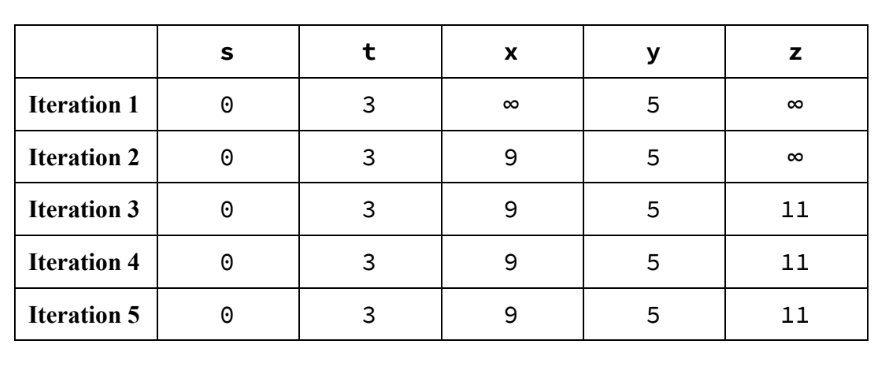




The image below shows the tables showing *pi* values of each vertex for each iteration.

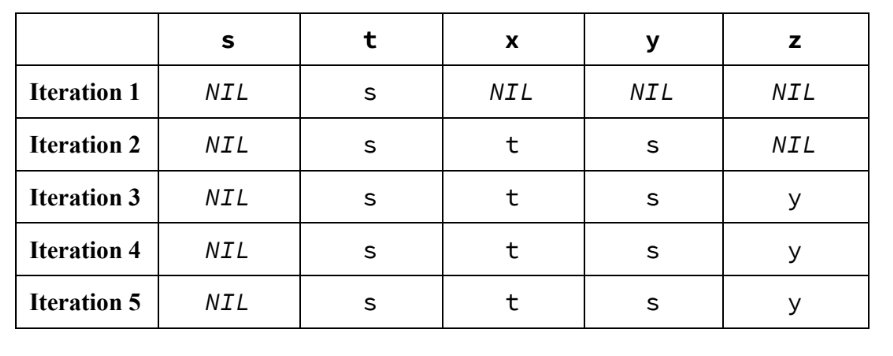